### BackPropagation Algorithm

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

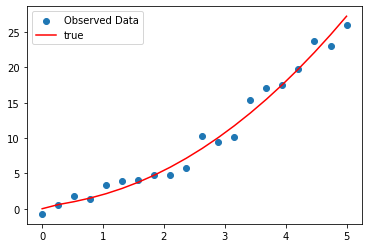

In [2]:
x_train=np.linspace(0,5,20)
def f(x):
    return x**2+np.sqrt(x)
y_train=f(x_train)+2*(-1+2*np.random.rand(20))

plt.scatter(x_train,y_train,label='Observed Data')
plt.plot(x_train,f(x_train),color='red',label='true')
plt.legend()

Note our features are orders of a polynomial evalutated at a point

In [16]:
features= x_train[:, np.newaxis]**[0,1,2]
features

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.26315789,  0.06925208],
       [ 1.        ,  0.52631579,  0.27700831],
       [ 1.        ,  0.78947368,  0.6232687 ],
       [ 1.        ,  1.05263158,  1.10803324],
       [ 1.        ,  1.31578947,  1.73130194],
       [ 1.        ,  1.57894737,  2.49307479],
       [ 1.        ,  1.84210526,  3.3933518 ],
       [ 1.        ,  2.10526316,  4.43213296],
       [ 1.        ,  2.36842105,  5.60941828],
       [ 1.        ,  2.63157895,  6.92520776],
       [ 1.        ,  2.89473684,  8.37950139],
       [ 1.        ,  3.15789474,  9.97229917],
       [ 1.        ,  3.42105263, 11.70360111],
       [ 1.        ,  3.68421053, 13.5734072 ],
       [ 1.        ,  3.94736842, 15.58171745],
       [ 1.        ,  4.21052632, 17.72853186],
       [ 1.        ,  4.47368421, 20.01385042],
       [ 1.        ,  4.73684211, 22.43767313],
       [ 1.        ,  5.        , 25.        ]])

Normalizing our data ( as we can do with discrete vectors)

In [17]:
def standardize(features):
    return (features-np.mean(features,axis=0))/np.linalg.norm(np.std(M,axis=0))

In [19]:
norm_features=standardize(features)
norm_features

array([[ 0.        , -0.31230921, -1.06842625],
       [ 0.        , -0.27943456, -1.05977503],
       [ 0.        , -0.2465599 , -1.03382135],
       [ 0.        , -0.21368525, -0.99056523],
       [ 0.        , -0.1808106 , -0.93000666],
       [ 0.        , -0.14793594, -0.85214563],
       [ 0.        , -0.11506129, -0.75698216],
       [ 0.        , -0.08218663, -0.64451624],
       [ 0.        , -0.04931198, -0.51474787],
       [ 0.        , -0.01643733, -0.36767705],
       [ 0.        ,  0.01643733, -0.20330378],
       [ 0.        ,  0.04931198, -0.02162806],
       [ 0.        ,  0.08218663,  0.17735011],
       [ 0.        ,  0.11506129,  0.39363072],
       [ 0.        ,  0.14793594,  0.62721379],
       [ 0.        ,  0.1808106 ,  0.87809931],
       [ 0.        ,  0.21368525,  1.14628727],
       [ 0.        ,  0.2465599 ,  1.43177769],
       [ 0.        ,  0.27943456,  1.73457055],
       [ 0.        ,  0.31230921,  2.05466587]])

Below is the algorithm responsible for forward propagation

In [52]:
def evaluate_network(features,target):
    input_w=np.random.rand(features.shape[1])
    activation_w=np.random.rand(features.shape[1])
    def relu(z):
        '''
        Activation layer of relu
        '''
        for i,el in enumerate(z):
            
            z[i]=max(0,el)
        return z
    
    loss=0
    for i in range(0,len(features)):
        layer1=relu(features[i]*input_w)
        
        diff=np.dot(activation_w,layer1)-target[i]
        loss=loss+diff*2
    
    return loss

In [53]:
evaluate_network(norm_features,y_train)

-393.34895497996297